In [2]:
train = pd.read_csv('../dataset/train.csv')

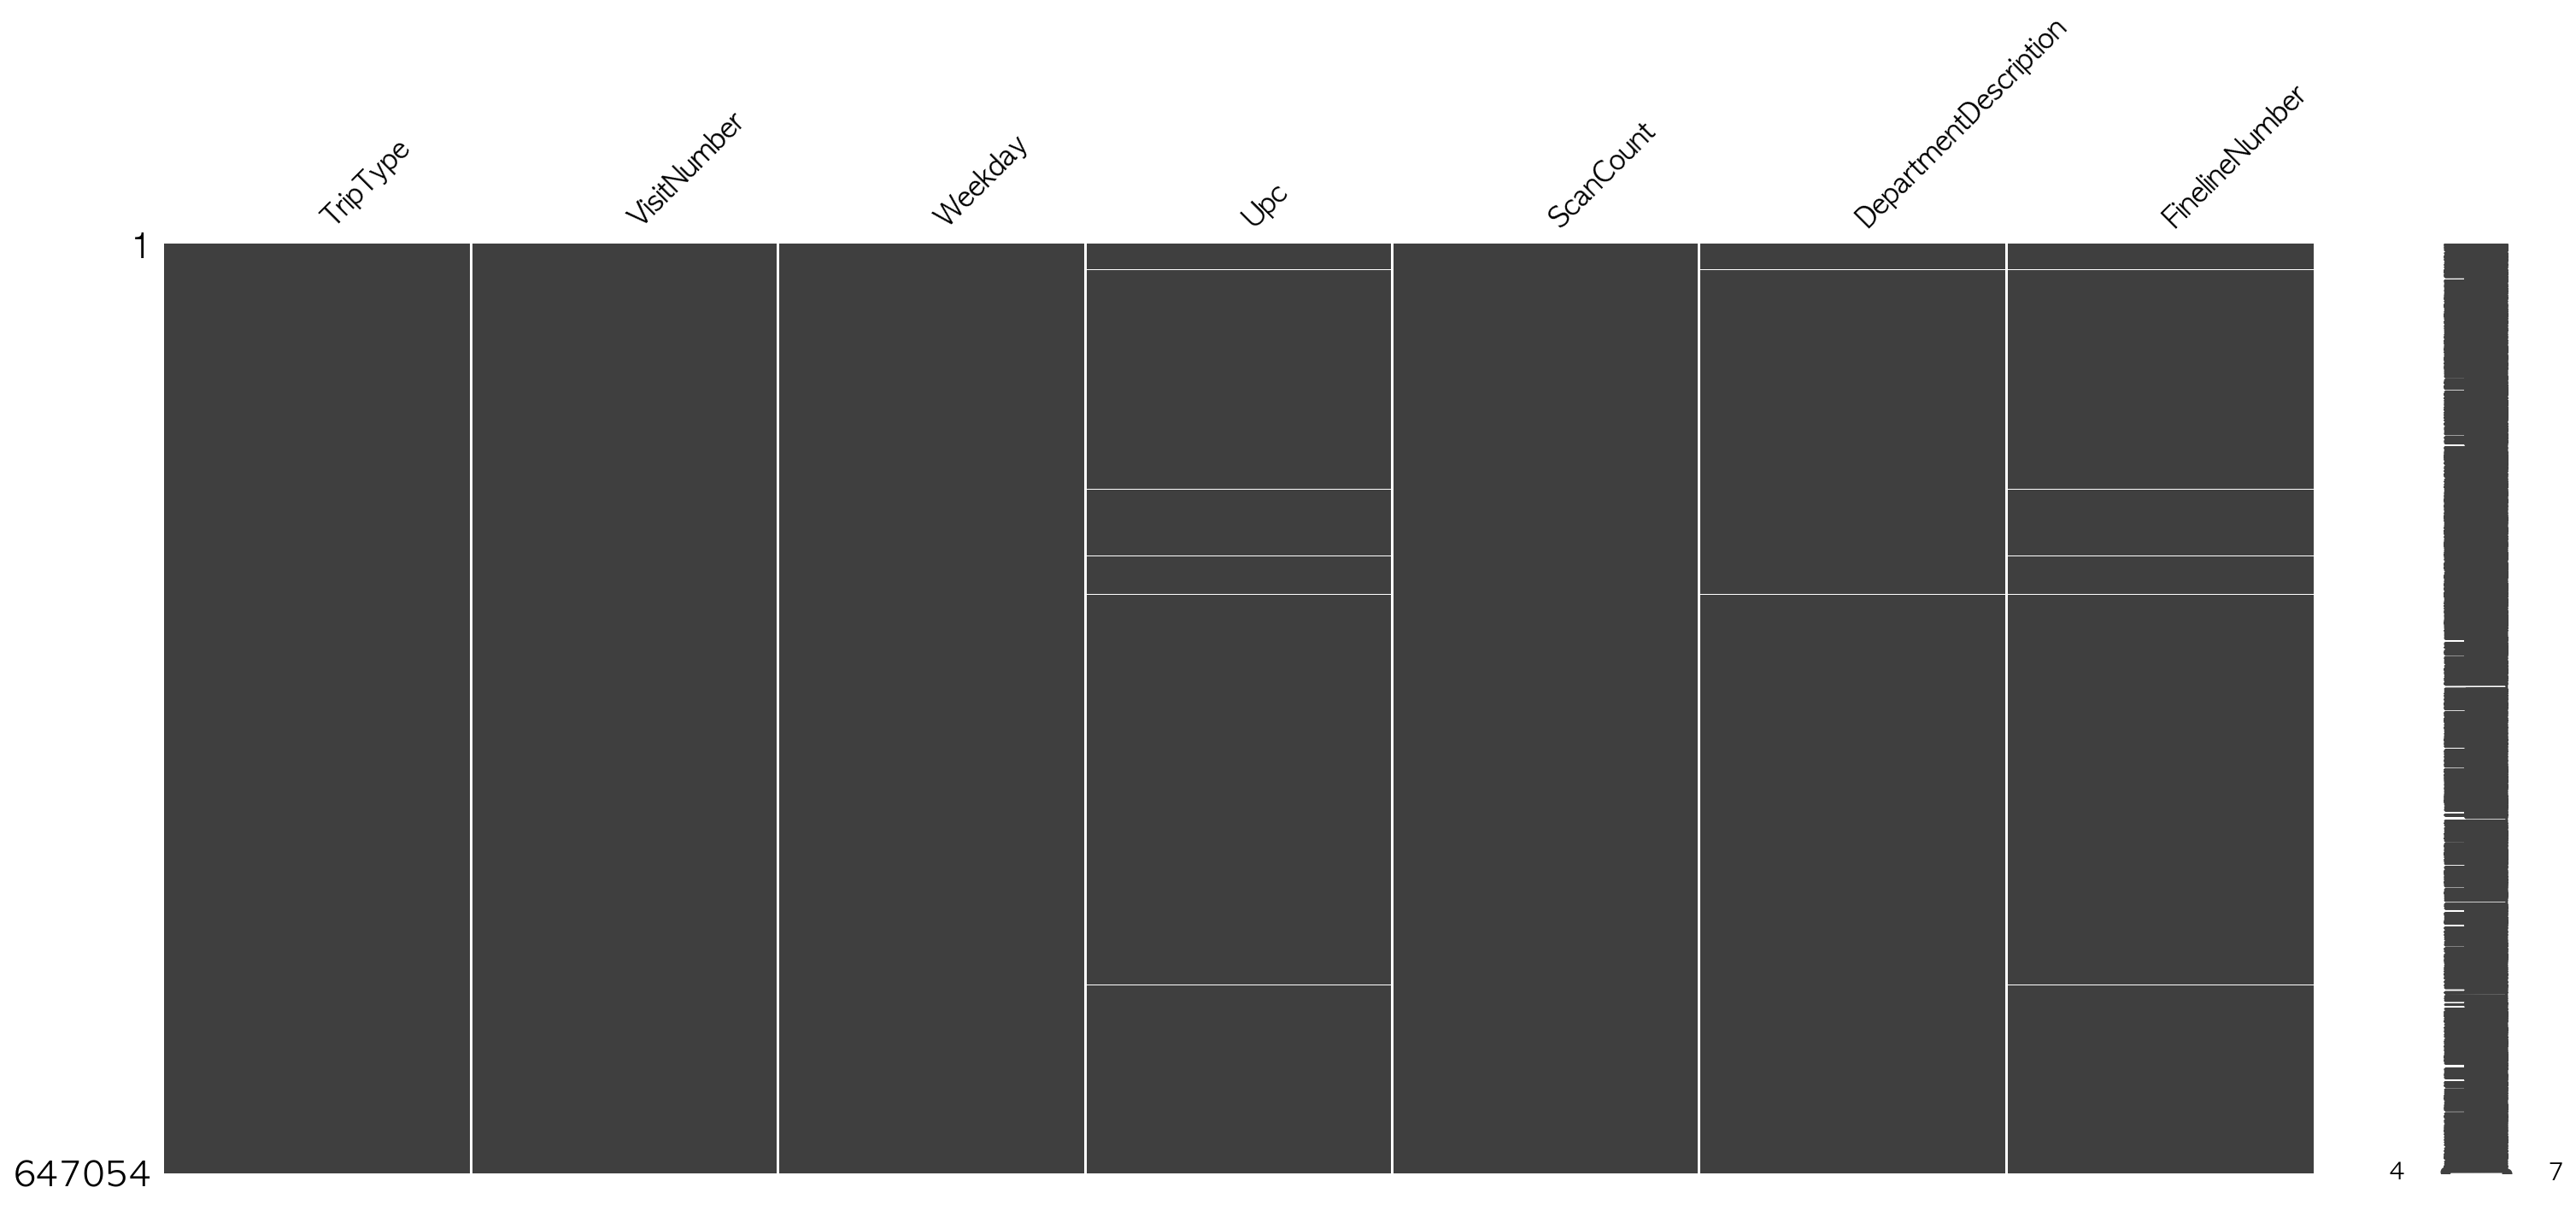

In [24]:
import missingno as msno
msno.matrix(train)

In [3]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [28]:
print("Missing Values in Upc:", train[train["Upc"].isnull()].shape[0])
train[train["Upc"].isnull()].head()

Missing Values in Upc: 4129


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


In [30]:
print("Missing Values in FinelineNumber:", train[train["FinelineNumber"].isnull()].shape[0])
train[train["FinelineNumber"].isnull()].head()

Missing Values in FinelineNumber: 4129


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


In [42]:
idx_upc = np.where(train["Upc"].isnull())[0]
idx_flnum = np.where(train["FinelineNumber"].isnull())[0]
print("idx_upc=idx_flnum:", np.any(idx_upc==idx_flnum))

idx_upc=idx_flnum: True


- Upc와 FinelineNumber의 Missing Value Index는 같음

In [29]:
print("Missing Values in DepartmentDescription:", train[train["DepartmentDescription"].isnull()].shape[0])
train[train["DepartmentDescription"].isnull()].head()

Missing Values in DepartmentDescription: 1361


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


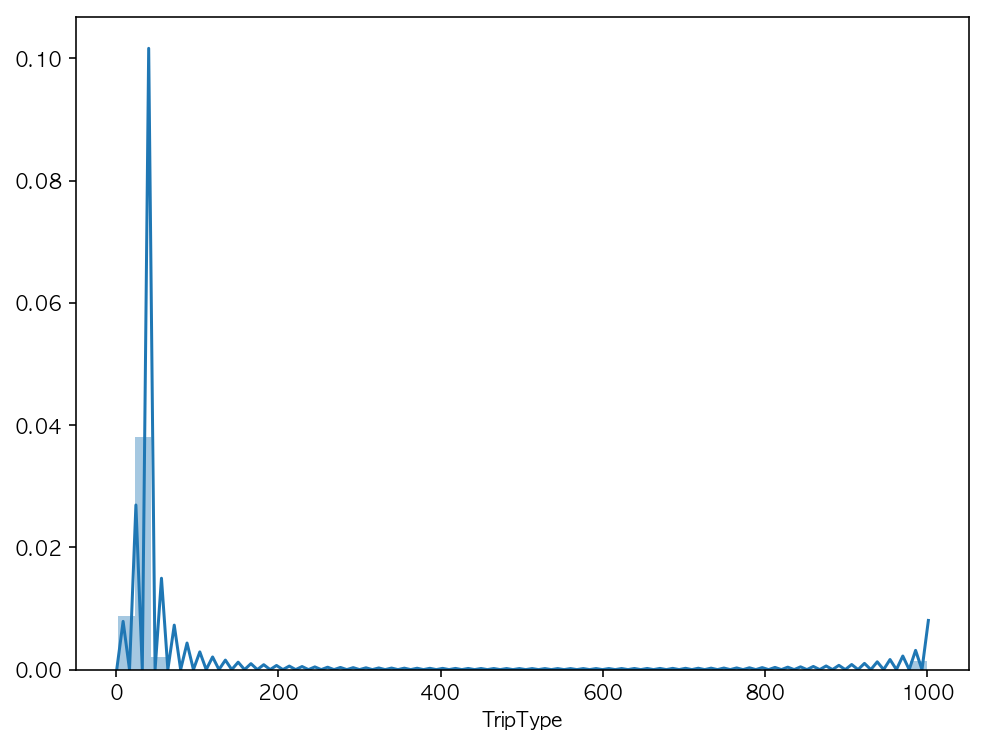

In [43]:
plt.figure(figsize=(8, 6))
sns.distplot(train.TripType)
plt.show()

In [44]:
wd = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3, 
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}
train["Weekday"] = train["Weekday"].apply(lambda x: wd[x])

In [45]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,6,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,6,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,6,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,6,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,6,3.800060e+09,1,GROCERY DRY GOODS,3600.0
